<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/src/inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Path to the Excel file
file_path = '/content/drive/MyDrive/ADS Datasets/statistic_id306648_inflation-rate-in-the-uk-1989-2024.xlsx'

df = pd.read_excel(file_path, sheet_name=1, header=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
a = df.head(5)
print(a.info())
a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  3 non-null      object 
 2   Unnamed: 2  1 non-null      float64
 3   Unnamed: 3  1 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes
None


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,Inflation rate in the UK 1989-2024,NaN,NaN
2,NaN,Inflation rate for the Consumer Price Index (C...,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,Jan 89,4.9,in %


In [4]:
df_cleaned = df[['Unnamed: 1', 'Unnamed: 2']].rename(columns={'Unnamed: 1': 'date', 'Unnamed: 2': 'inflation rate'})
df_cleaned

,date,inflation rate
0,NaN,NaN
1,Inflation rate in the UK 1989-2024,NaN
2,Inflation rate for the Consumer Price Index (C...,NaN
3,NaN,NaN
4,Jan 89,4.9
...,...,...
420,Sep 23,6.7
421,Oct 23,4.6
422,Nov 23,3.9
423,Dec 23,4.0


In [5]:
# Dropped first 3 columns
rows_to_drop = df_cleaned.index[0:4]
df_dropped = df_cleaned.drop(rows_to_drop).reset_index(drop=True)

# Check the DataFrame after dropping rows
print(df_dropped)

       date  inflation rate
0    Jan 89             4.9
1    Feb 89             5.0
2    Mar 89             5.0
3    Apr 89             5.3
4    May 89             5.3
..      ...             ...
416  Sep 23             6.7
417  Oct 23             4.6
418  Nov 23             3.9
419  Dec 23             4.0
420  Jan 24             4.0

[421 rows x 2 columns]


In [6]:
# Remove 2024 data as we can't take a mean to estimate the whole year from 1 datapoint
last_index = df_dropped.index[-1]  # Get the last row's index
df_dropped = df_dropped.drop(last_index)

In [7]:
print(df_dropped)

       date  inflation rate
0    Jan 89             4.9
1    Feb 89             5.0
2    Mar 89             5.0
3    Apr 89             5.3
4    May 89             5.3
..      ...             ...
415  Aug 23             6.7
416  Sep 23             6.7
417  Oct 23             4.6
418  Nov 23             3.9
419  Dec 23             4.0

[420 rows x 2 columns]


In [8]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            420 non-null    object 
 1   inflation rate  420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [9]:
# Convert to datetime
df_dropped['date'] = pd.to_datetime(df_dropped['date'], format='%b %y')

In [10]:
df_dropped['date'] = df_dropped['date'].dt.year
df_dropped.head()

,date,inflation rate
0,1989,4.9
1,1989,5.0
2,1989,5.0
3,1989,5.3
4,1989,5.3


In [11]:
# Get the average inflation by year
average_inflation = df_dropped.groupby('date')['inflation rate'].mean()
average_inflation = average_inflation.reset_index()

In [12]:
# Rename columns
average_inflation.rename(columns={'date': 'year', 'inflation rate': 'avg_inflation_rate'}, inplace=True)

In [13]:
print(average_inflation)

    year  avg_inflation_rate
0   1989            5.216667
1   1990            6.983333
2   1991            7.533333
3   1992            4.291667
4   1993            2.533333
5   1994            1.983333
6   1995            2.650000
7   1996            2.433333
8   1997            1.825000
9   1998            1.566667
10  1999            1.325000
11  2000            0.800000
12  2001            1.233333
13  2002            1.258333
14  2003            1.358333
15  2004            1.350000
16  2005            2.041667
17  2006            2.316667
18  2007            2.341667
19  2008            3.608333
20  2009            2.183333
21  2010            3.308333
22  2011            4.475000
23  2012            2.841667
24  2013            2.566667
25  2014            1.458333
26  2015            0.041667
27  2016            0.675000
28  2017            2.683333
29  2018            2.483333
30  2019            1.791667
31  2020            0.850000
32  2021            2.575000
33  2022      

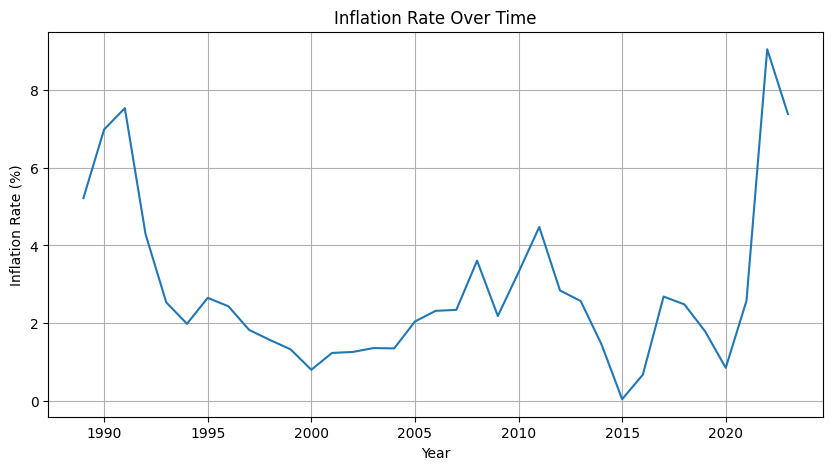

In [14]:
# Plot inflation rate against year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(average_inflation['year'], average_inflation['avg_inflation_rate'])
plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
# plt.xticks(average_inflation['year'].unique())
plt.show()

## Save wrangled data in a csv file

In [15]:
average_inflation.to_csv('inflation_rate_wrangled.csv', index=False)